# Matplotlib의 triangular grid 사용법

Matplotlib 버전 1.3부터는 삼각 그리드(triangular grid)에 대한 지원이 추가되었다. 삼각 그리드를 사용하연 기존의 사각형 영역 뿐 아니라 임의의 영역에 대해서 컨투어 플롯이나 서피스 플롯을 그릴 수 있으므로 정의역(domain)이 직사각형이 아닌 2차원 함수도 시각화 할 수 있다.

## 패키지

삼각 그리드 지원을 위한 코드 중 일부는 tri 서브 패키지 아래에 있으므로 미리 임포트한다.

In [1]:
import matplotlib.tri as mtri

## 삼각 그리드 클래스

삼각 그리드 지원을 위한 클래스는 다음과 같다.

* 삼각 그리드 생성
  * `Triangulation`
     * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.Triangulation


* 삼각 그리드 세분화
  * `TriRefiner`
    * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.TriRefiner
  * `UniformTriRefiner`
    * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.UniformTriRefiner


* 삼각 그리드 플롯
  * `triplot`
    * http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.triplot
  * `tricontour`
    * http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tricontour    
  * `tricontourf`
    * http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tricontourf        
  * `tripcolor`
    * http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tripcolor          
    
* 삼각 그리드 보간
  * `TriInterpolator`
    * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.TriInterpolator
  * `LinearTriInterpolator`
    * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.LinearTriInterpolator
  * `CubicTriInterpolator`
    * http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.CubicTriInterpolator
   

## 삼각 그리드 생성

삼각 그리드는 `Triangulation` 클래스로 생성한다. `Triangulation` 클래스는 `x`. `y`, `triangles` 세 개의 인수를 받는데 `x`, `y`는 일련의 점들의 x좌표와 y좌표를 나타내는 1차원 벡터들이고 `triangles`는 이 점들에 대한 기하학적 위상 정보 즉, 어떤 삼각형이 있으며 각 삼각형이 어떤 점들로 이루어져있는가를 보인다. 만약 `triangles`가 주어지지 않으면 자동으로 생성한다.

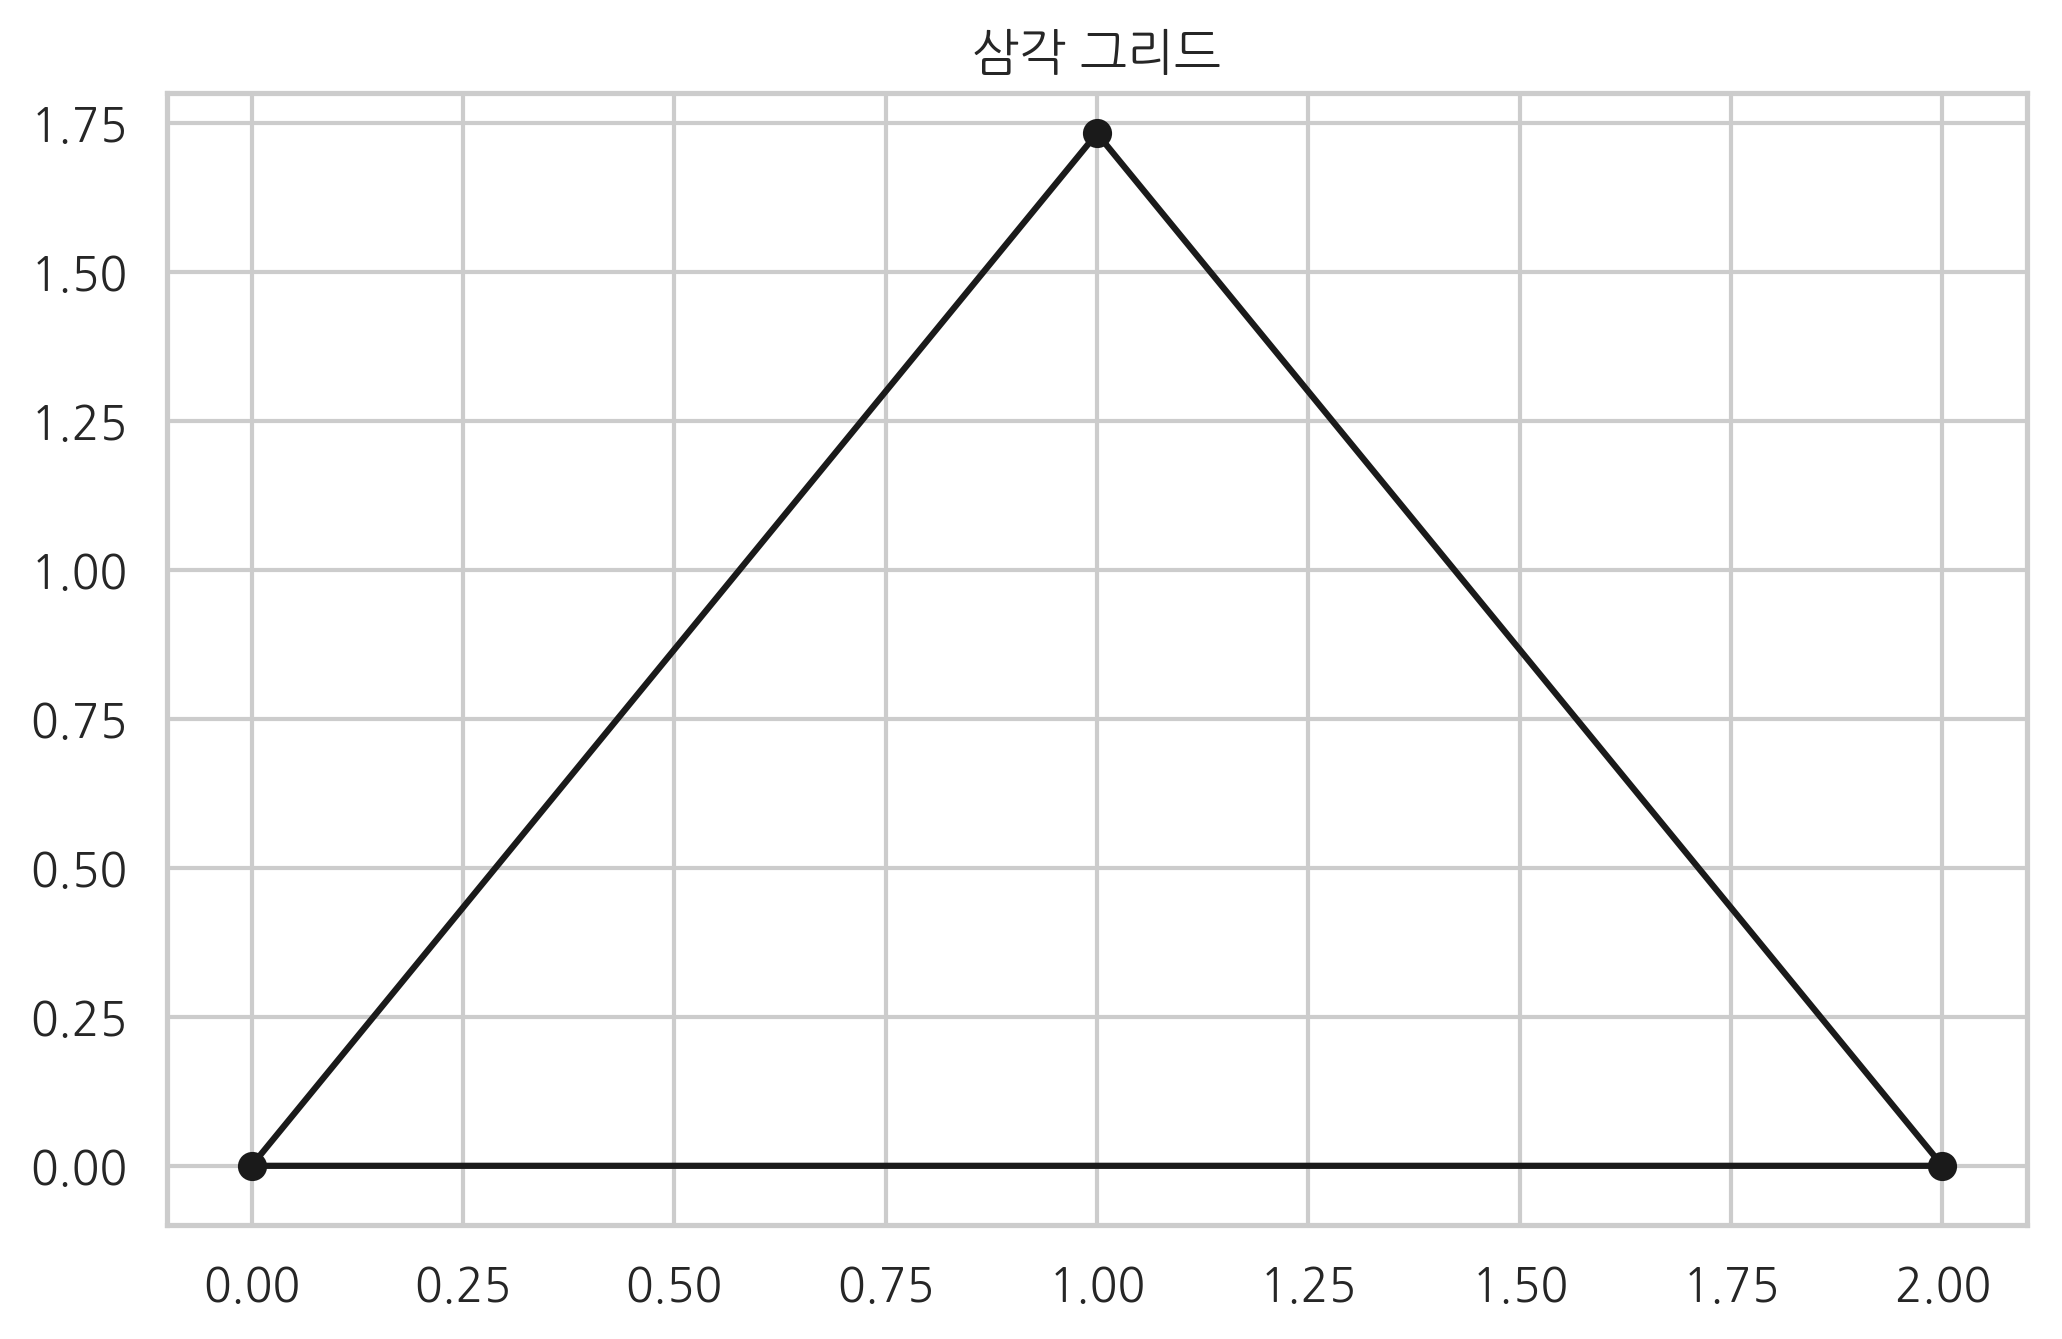

In [2]:
x = np.array([0, 1, 2])
y = np.array([0, np.sqrt(3), 0])
triangles = [[0, 1, 2]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("삼각 그리드")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.show()

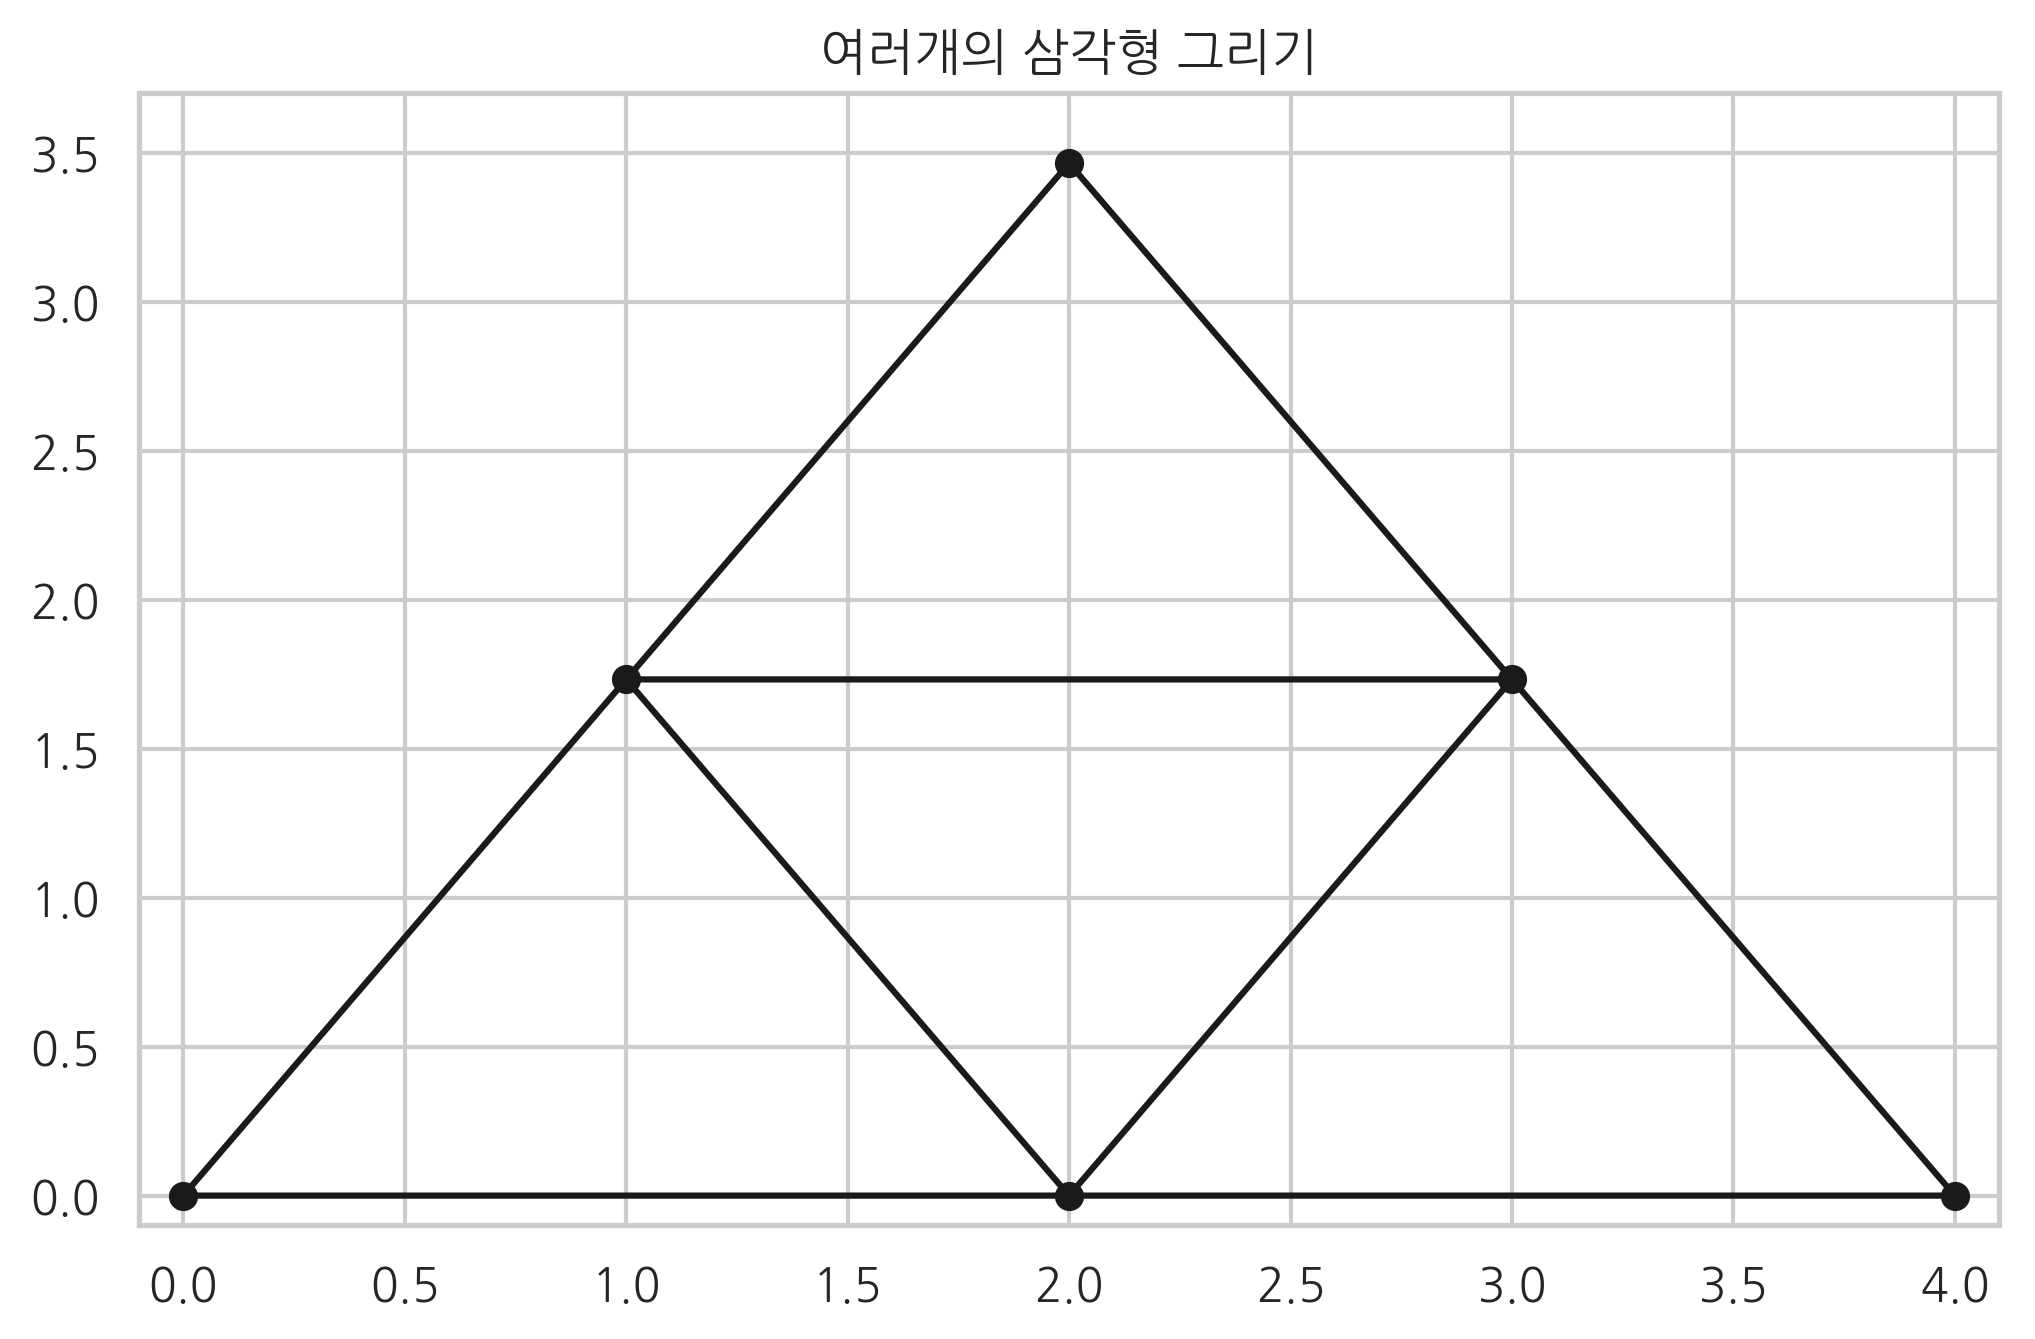

In [3]:
x = np.asarray([0, 1, 2, 3, 4, 2])
y = np.asarray([0, np.sqrt(3), 0, np.sqrt(3), 0, 2*np.sqrt(3)])
triangles = [[0, 1, 2], [2, 3, 4], [1, 2, 3], [1, 3, 5]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("여러개의 삼각형 그리기")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

## 그리드 세분화

그리드를 더 세분화하려면 `TriRefiner` 또는 `UniformTriRefiner`를 사용한다. 이 클래스들은 다음과 같은 메서드를 가진다.

* `refine_triangulation` : 단순히 삼각 그리드를 세분화
  * http://matplotlib.org/api/tri_api.html#matplotlib.tri.UniformTriRefiner.refine_triangulation
  
* `refine_field` : 실제 함수 값에 대해 최적화된 삼각 그리드 생성
  * http://matplotlib.org/api/tri_api.html#matplotlib.tri.UniformTriRefiner.refine_field

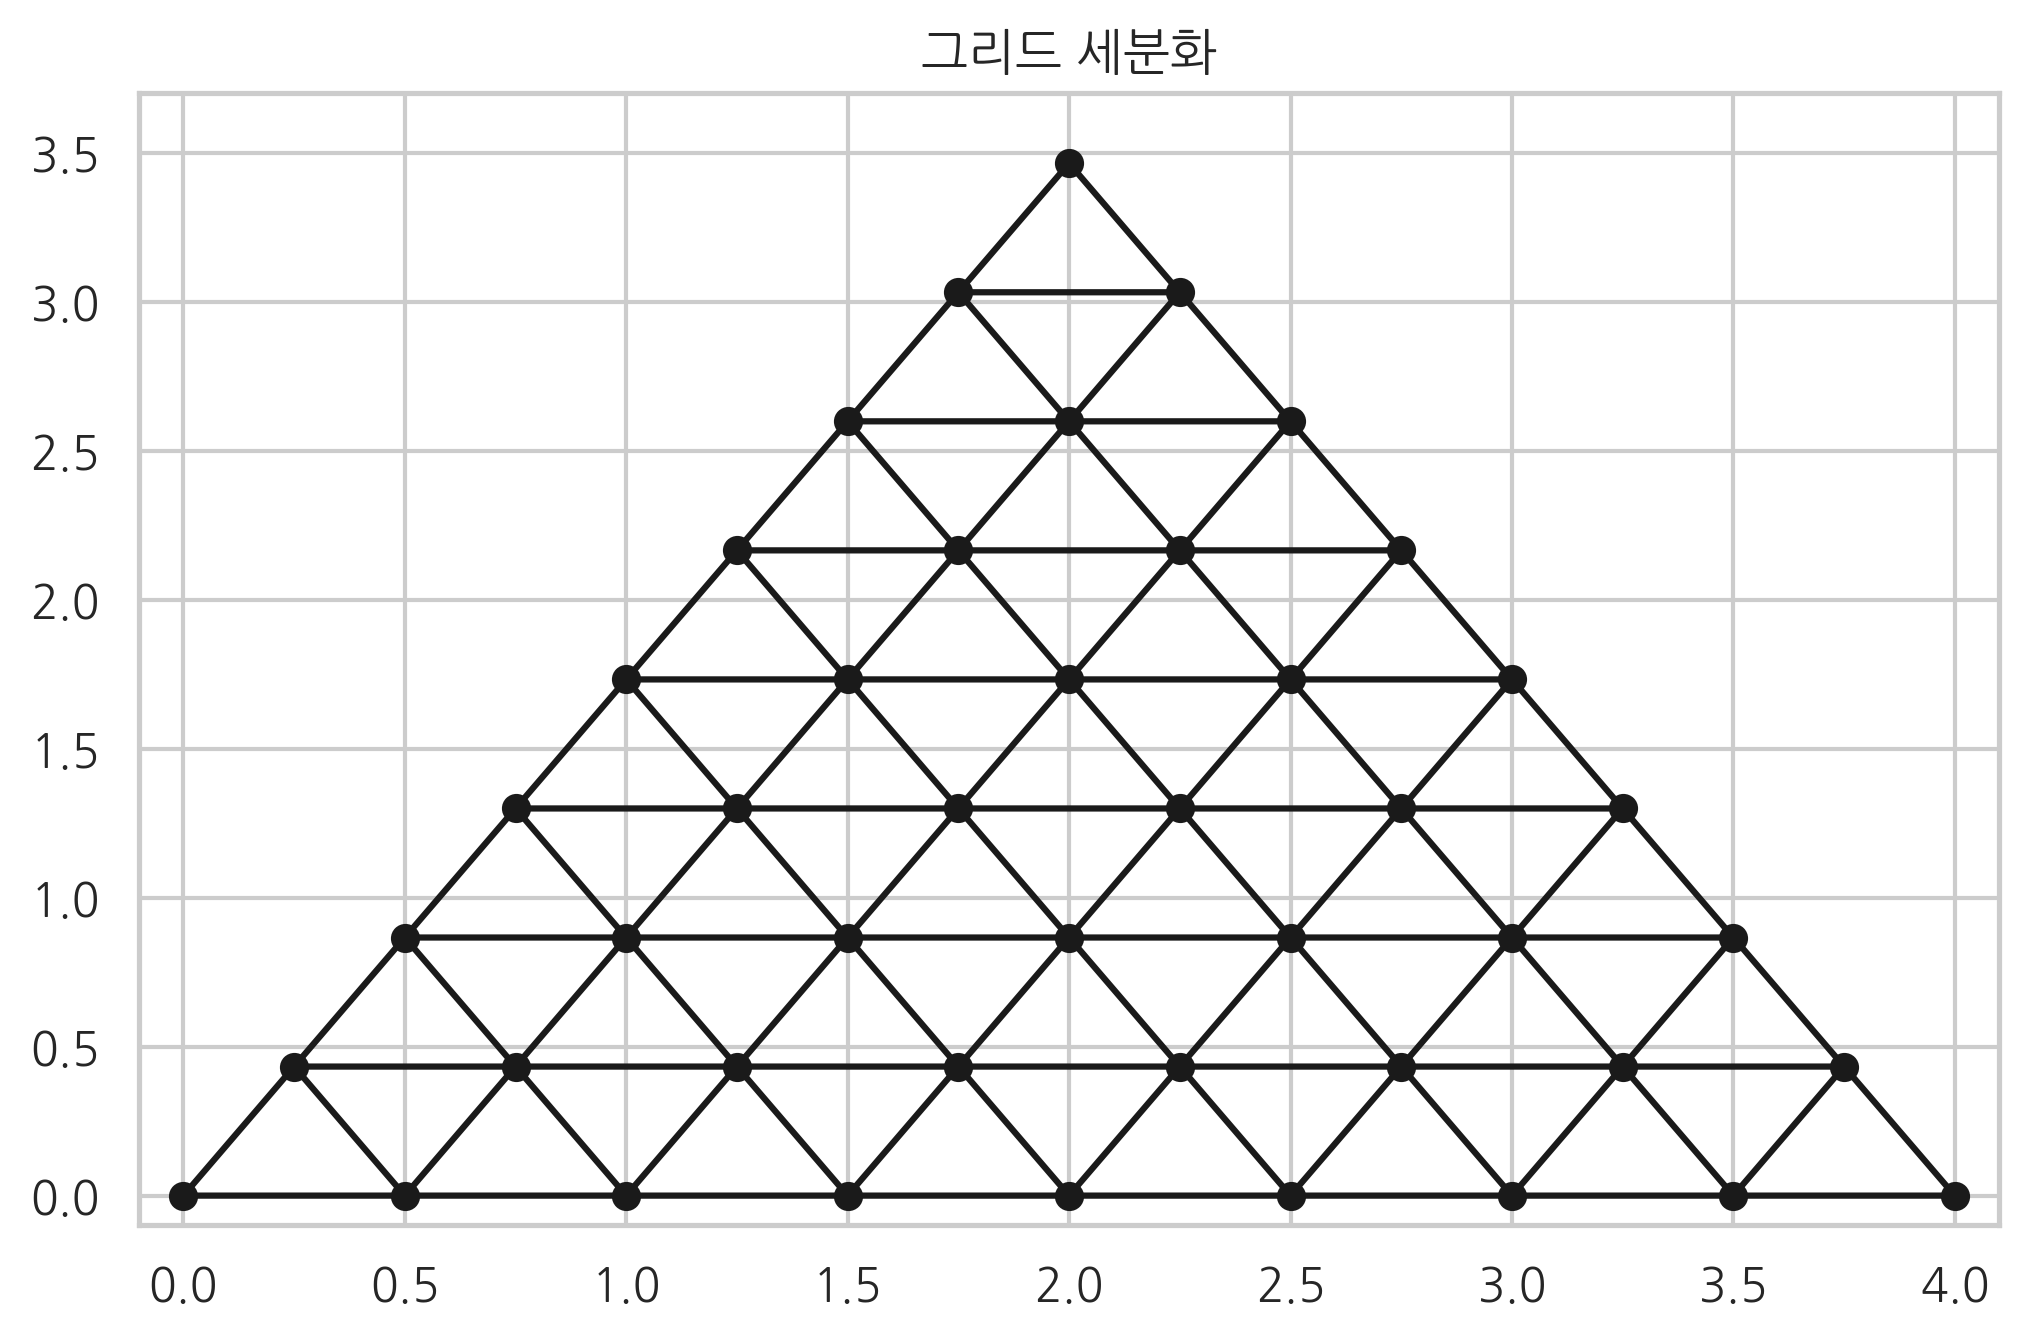

In [4]:
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=2)
plt.title("그리드 세분화")
plt.triplot(triang2, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

## 그리드 플롯

이렇게 만들어진 그리드상에 ``tricontour``, ``tricontourf``, ``plot_trisur ``, ``plot_trisurf `` 등의 명령을 사용하여 2차원 등고선(coutour) 플롯이나 3차원 표면(surface) 플롯을 그릴 수 있다.

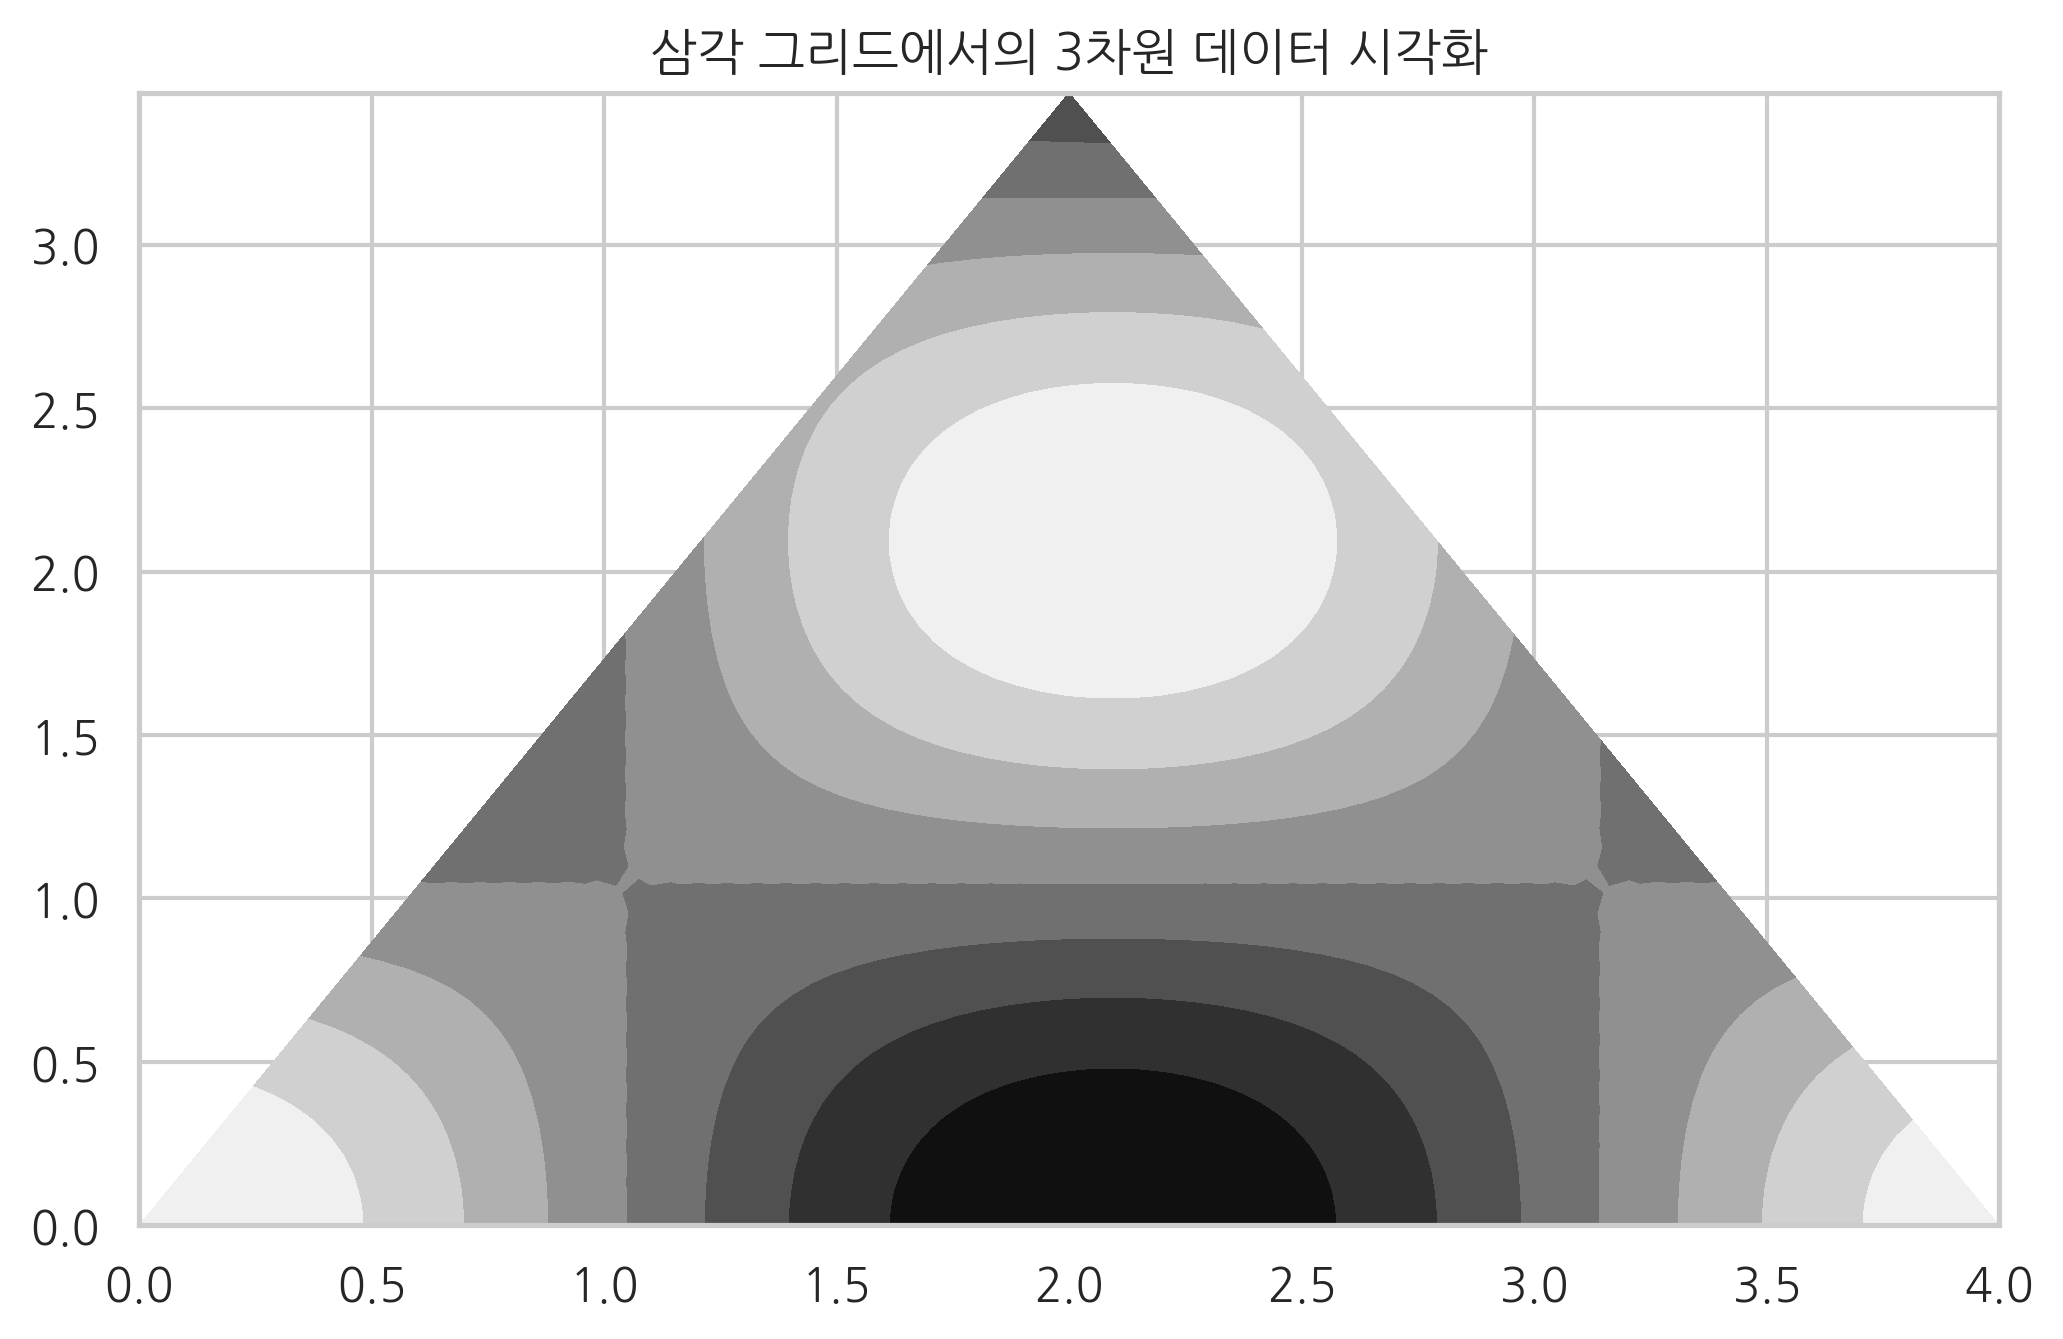

In [5]:
triang5 = refiner.refine_triangulation(subdiv=5)
z5 = np.cos(1.5*triang5.x)*np.cos(1.5*triang5.y)
plt.title("삼각 그리드에서의 3차원 데이터 시각화")
plt.tricontourf(triang5, z5, cmap="gray")
plt.show()

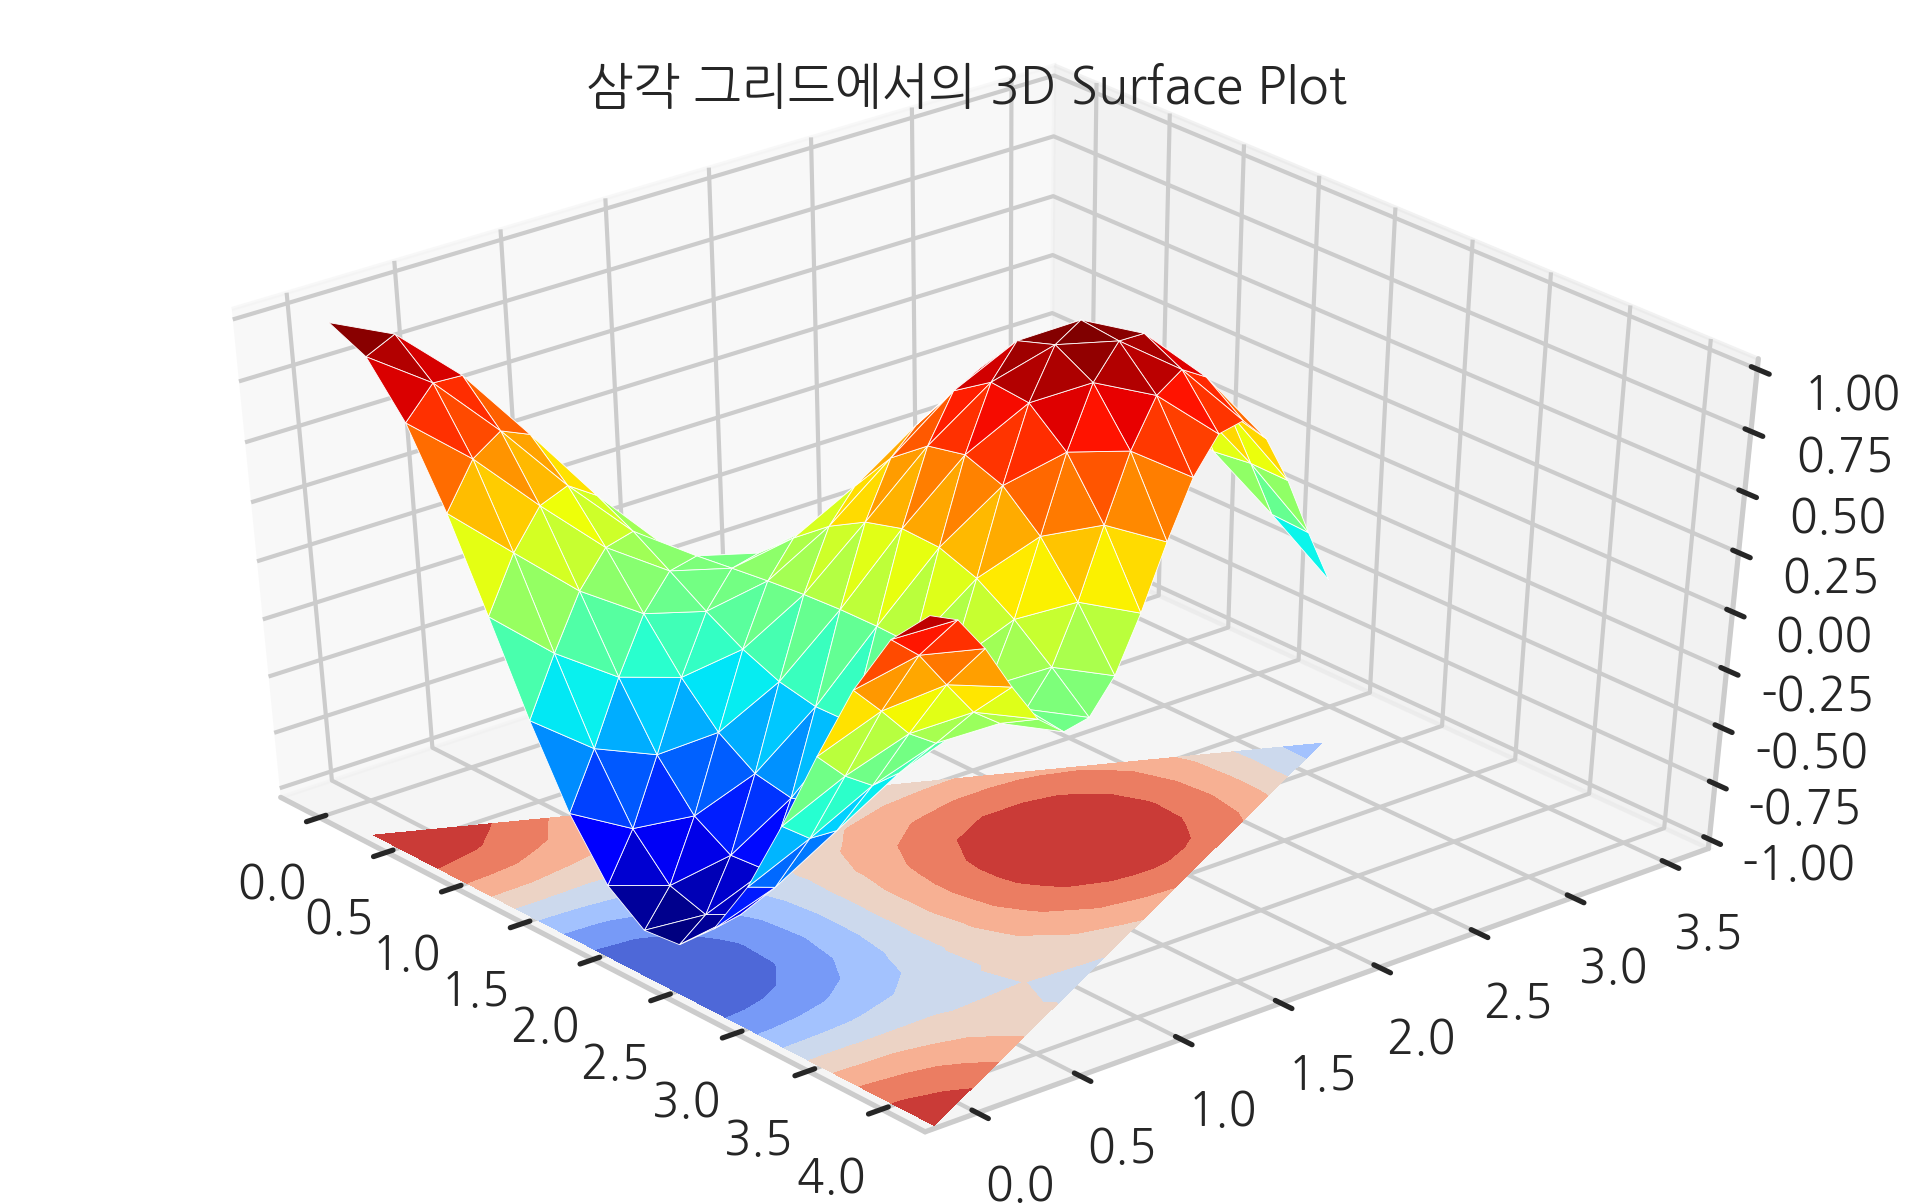

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

triang3 = refiner.refine_triangulation(subdiv=3)
z3 = np.cos(1.5 * triang3.x) * np.cos(1.5 * triang3.y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("삼각 그리드에서의 3D Surface Plot")
ax.plot_trisurf(triang3.x, triang3.y, z3, cmap=cm.jet, linewidth=0.2)
ax.tricontourf(triang3, z3, zdir='z', offset=-1.2, cmap=cm.coolwarm)
ax.set_zlim(-1, 1)
ax.view_init(40, -40)
plt.show()